In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-02-24 14:07:17.248331


In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('GPU device found')
else:
    print("No GPU found")


2024-02-24 14:07:25.868081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 14:07:25.868117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 14:07:25.868858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 14:07:25.873239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-24 14:07:26.516145: W tensorflow/compiler/tf2

GPU device found


2024-02-24 14:07:27.418700: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 14:07:27.727263: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 14:07:27.727611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-02-24 14:07:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:803::201b, 2404:6800:4009:805::201b, 2404:6800:4009:832::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:803::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  16.4MB/s    in 8.0s    

2024-02-24 14:07:42 (13.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

we start with a smaller dataset instead of the food101 because we can experiment quickly and figure what works before scalling up. The smaller dataset consists of only the pizza and steak.

Now lets inspect the data

In [5]:
!ls pizza_steak

test  train


In [6]:
!ls pizza_steak/train/

pizza  steak


In [7]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [8]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .


In [9]:
!ls -la pizza_steak

total 4
drwxr-xr-x. 1 saikalyansathish saikalyansathish  18 Feb 24 14:07 .
drwxr-xr-x. 1 saikalyansathish saikalyansathish 364 Feb 24 14:07 ..
drwxr-xr-x. 1 saikalyansathish saikalyansathish  20 Feb 24 14:07 test
drwxr-xr-x. 1 saikalyansathish saikalyansathish  20 Feb 24 14:07 train


Okay surprisingly i didnt find any .DS_Store file which daniel showed but still no problem we will proceed.

In [10]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the clas names programmatically.

In [11]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [12]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #show the shape of the image
  return img

['1284978.jpg']
Image shape: (512, 512, 3)


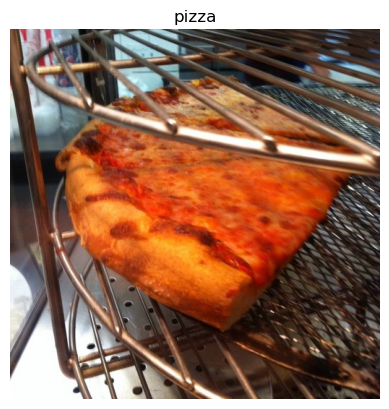

In [13]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

Initially when we return img it returns and inputs as an array so below we convert it to a tensor.

In [14]:
import tensorflow as tf
tf.constant(img)

2024-02-24 14:09:58.907922: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[138,  79,  71],
        [138,  86,  73],
        [121,  83,  62],
        ...,
        [ 39,  30,  25],
        [ 39,  30,  25],
        [ 39,  30,  25]],

       [[136,  78,  67],
        [135,  86,  71],
        [122,  84,  63],
        ...,
        [ 43,  34,  29],
        [ 41,  32,  27],
        [ 41,  32,  27]],

       [[129,  75,  63],
        [133,  86,  70],
        [123,  85,  62],
        ...,
        [ 48,  39,  34],
        [ 46,  36,  34],
        [ 45,  35,  33]],

       ...,

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 18,   7,   5],
        [ 20,   9,   5],
        [ 24,  10,   7]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 19,   8,   6],
        [ 20,   9,   5],
        [ 21,  10,   6]],

       [[253, 255, 254],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [ 24,  13,  1

2024-02-24 14:09:58.908203: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 14:09:58.908322: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 14:09:58.908659: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [16]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.54117647, 0.30980392, 0.27843137],
        [0.54117647, 0.3372549 , 0.28627451],
        [0.4745098 , 0.3254902 , 0.24313725],
        ...,
        [0.15294118, 0.11764706, 0.09803922],
        [0.15294118, 0.11764706, 0.09803922],
        [0.15294118, 0.11764706, 0.09803922]],

       [[0.53333333, 0.30588235, 0.2627451 ],
        [0.52941176, 0.3372549 , 0.27843137],
        [0.47843137, 0.32941176, 0.24705882],
        ...,
        [0.16862745, 0.13333333, 0.11372549],
        [0.16078431, 0.1254902 , 0.10588235],
        [0.16078431, 0.1254902 , 0.10588235]],

       [[0.50588235, 0.29411765, 0.24705882],
        [0.52156863, 0.3372549 , 0.2745098 ],
        [0.48235294, 0.33333333, 0.24313725],
        ...,
        [0.18823529, 0.15294118, 0.13333333],
        [0.18039216, 0.14117647, 0.13333333],
        [0.17647059, 0.1372549 , 0.12941176]],

       ...,

       [[0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        [0.99215686, 1

As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale(also referred to as normalize) their pixel values by dividing the image arrays by 255.(since 255 is the maximum pixel value).

In [17]:
#An end-to-end example

lets build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 and1 , also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "/home/saikalyansathish/Downloads/pizza_steak"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size=64, target_size=(224, 224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,batch_size=64, target_size=(224, 224), class_mode="binary", seed=42)

#Build a CNN model (same as the Tiny VGG on the CNN-explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])
# Compile our CNN
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))




Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2024-02-24 14:17:18.479362: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.
2024-02-24 14:17:19.328035: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.
2024-02-24 14:17:19.571092: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.
2024-02-24 14:17:19.772205: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.


 4/32 [==>...........................] - ETA: 2s - loss: 0.6613 - accuracy: 0.6094

2024-02-24 14:17:25.010430: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.


32/32 [==============================] - 15s 285ms/step - loss: 0.5859 - accuracy: 0.7330 - val_loss: 0.8145 - val_accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 8s 243ms/step - loss: 0.5653 - accuracy: 0.7500 - val_loss: 0.7599 - val_accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 8s 242ms/step - loss: 0.5572 - accuracy: 0.7500 - val_loss: 0.7564 - val_accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 8s 240ms/step - loss: 0.5521 - accuracy: 0.7500 - val_loss: 0.9054 - val_accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 8s 241ms/step - loss: 0.5140 - accuracy: 0.7630 - val_loss: 0.8172 - val_accuracy: 0.4260


In [19]:
len(train_data) # 1500/32

63

if the above cell is taking longer than 10seconds per epoch, make sure you're using a gpu.

In [20]:
#Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [21]:
train_data

Using the same model as before for different dataset

Lets replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the tensorflow playground:



In [22]:
# Set random seed
tf.random.set_seed(42)

#Create a model to replicate the Tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))




Epoch 1/5
63/63 [==============================] - 8s 113ms/step - loss: 0.7934 - accuracy: 0.7120 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/5
63/63 [==============================] - 7s 112ms/step - loss: 0.6747 - accuracy: 0.7500 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 3/5
63/63 [==============================] - 7s 113ms/step - loss: 0.6627 - accuracy: 0.7500 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 4/5
63/63 [==============================] - 7s 117ms/step - loss: 0.6516 - accuracy: 0.7500 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 5/5
63/63 [==============================] - 7s 112ms/step - loss: 0.6414 - accuracy: 0.7500 - val_loss: 0.7015 - val_accuracy: 0.5000


In [25]:
import tensorflow as tf

# Get the list of physical devices
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    # Print information about each GPU
    for gpu in physical_devices:
        print("GPU:", gpu.name)
        device_details = tf.test.gpu_device_name()
        print("Model:", device_details)
else:
    print("No GPU available. TensorFlow is using CPU.")


GPU: /physical_device:GPU:0
Model: /device:GPU:0


2024-02-24 14:15:15.659581: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 14:15:15.659874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 14:15:15.660076: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-